In [21]:
#!source ../activate_conda.sh
import processor.fake_rate_measurement as fr
import matplotlib.pyplot as plt
import awkward as ak

from coffea import processor, hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import Weights, PackedSelection

import numpy as np

# this is all very bad practice
from Tools.objects import *
from Tools.basic_objects import *
from Tools.cutflow import *
from Tools.config_helpers import *
from Tools.triggers import *
from Tools.btag_scalefactors import *
from Tools.lepton_scalefactors import *

In [4]:
from klepto.archives import dir_archive
from processor.default_accumulators import desired_output, add_processes_to_output, dataset_axis, pt_axis, eta_axis

from Tools.helpers import get_samples
from Tools.config_helpers import redirector_ucsd, redirector_fnal
from Tools.nano_mapping import make_fileset

overwrite = False

# load the config and the cache
cfg = loadConfig()

cacheName = 'nano_analysis'
cache = dir_archive(os.path.join(os.path.expandvars(cfg['caches']['base']), cacheName), serialized=True)
histograms = sorted(list(desired_output.keys()))

year = 2018

samples = get_samples()

fileset = make_fileset(['QCD'], samples, redirector=redirector_ucsd, small=True)

add_processes_to_output(fileset, desired_output)

desired_output.update({
    "single_mu_fakeable": hist.Hist("Counts", dataset_axis, pt_axis, eta_axis),
    "single_mu": hist.Hist("Counts", dataset_axis, pt_axis, eta_axis)
})

exe_args = {
    'workers': 16,
    'function_args': {'flatten': False},
    "schema": NanoAODSchema,
}
exe = processor.futures_executor

if not overwrite:
    cache.load()

if cfg == cache.get('cfg') and histograms == cache.get('histograms') and cache.get('simple_output'):
    output = cache.get('simple_output')

else:
    print ("I'm running now")

    output = processor.run_uproot_job(
        fileset,
        "Events",
        fr.nano_analysis(year=year, variations=[], accumulator=desired_output),
        exe,
        exe_args,
        chunksize=250000,
    )

    cache['fileset']        = fileset
    cache['cfg']            = cfg
    cache['histograms']     = histograms
    cache['simple_output']  = output
    cache.dump()


In [5]:
fakeable_mu_hist = output["single_mu_fakeable"]
mu_hist = output["single_mu"]

In [7]:
type(fakeable_mu_hist)

coffea.hist.hist_tools.Hist

<AxesSubplot:xlabel='$eta\\ (GeV)$', ylabel='$p_{T}\\ (GeV)$'>

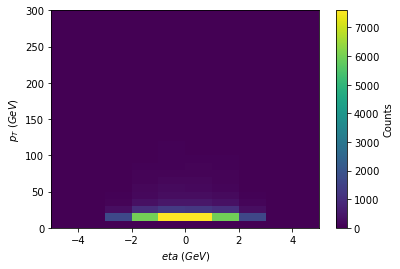

In [25]:
pt_bins = hist.Bin('pt', r'$p_{T}\ (GeV)$', 30, 0, 300)
eta_bins = hist.Bin('eta', r'$eta\ (GeV)$', 10, -5, 5)
rebinned_fakeable_mu_hist = fakeable_mu_hist.rebin('pt', pt_bins).rebin('eta', eta_bins)
hist.plot2d(rebinned_fakeable_mu_hist.sum("dataset"), xaxis="eta")

<AxesSubplot:xlabel='$eta\\ (GeV)$', ylabel='$p_{T}\\ (GeV)$'>

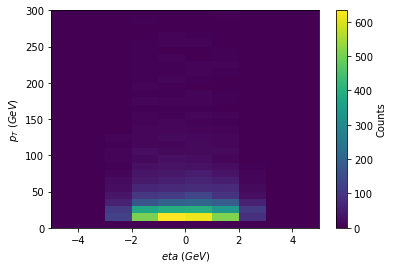

In [24]:
rebinned_mu_hist = mu_hist.rebin('pt', pt_bins).rebin('eta', eta_bins)
hist.plot2d(rebinned_mu_hist.sum("dataset"), xaxis="eta")

<AxesSubplot:xlabel='$eta\\ (GeV)$', ylabel='$p_{T}\\ (GeV)$'>

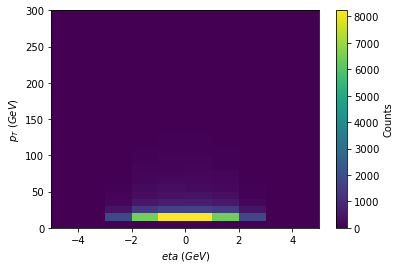

In [32]:
f_plus_t = rebinned_mu_hist + rebinned_fakeable_mu_hist
hist.plot2d(f_plus_t.sum("dataset"), xaxis="eta")

In [33]:
a = rebinned_mu_hist

In [35]:
a.sum("dataset").values()

{(): array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0., 120., 505., 633., 618., 511.,  87.,   0.,   0.],
        [  0.,   0., 110., 376., 393., 399., 339., 107.,   0.,   0.],
        [  0.,   0.,  57., 164., 197., 205., 185.,  57.,   0.,   0.],
        [  0.,   0.,  36., 101., 110., 132.,  93.,  23.,   0.,   0.],
        [  0.,   0.,  20.,  67.,  71.,  79.,  76.,  16.,   0.,   0.],
        [  0.,   0.,  19.,  44.,  53.,  64.,  52.,   8.,   0.,   0.],
        [  0.,   0.,   8.,  35.,  41.,  48.,  33.,   8.,   0.,   0.],
        [  0.,   0.,   3.,  27.,  30.,  29.,  22.,   4.,   0.,   0.],
        [  0.,   0.,   5.,  16.,  25.,  22.,  10.,   2.,   0.,   0.],
        [  0.,   0.,   5.,  20.,  15.,  16.,  17.,   1.,   0.,   0.],
        [  0.,   0.,   4.,  11.,   8.,  15.,  11.,   2.,   0.,   0.],
        [  0.,   0.,   6.,  11.,  16.,  13.,  12.,   0.,   0.,   0.],
        [  0.,   0.,   1.,  10.,  11.,   9.,   6.,   1.,   0.,   0.],
        [  0.,  